# Customer Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
data=pd.read_csv("customer_churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning and Preprocessing

In [4]:
data.drop("customerID",axis="columns",inplace=True)

In [5]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
for column in data:
    print(f'{column} : {data[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [7]:
np.array([data["TotalCharges"]])

array([['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5']],
      dtype=object)

In [8]:
data[data.TotalCharges==" "].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [9]:
dropping_data=np.array([data[data.TotalCharges==" "].index])
dropping_data

array([[ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]],
      dtype=int64)

In [10]:
data.drop(dropping_data[0],inplace=True)

In [11]:
data.shape

(7032, 20)

In [12]:
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])

In [13]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
for column in data:
    print(f'{column} : {data[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [15]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


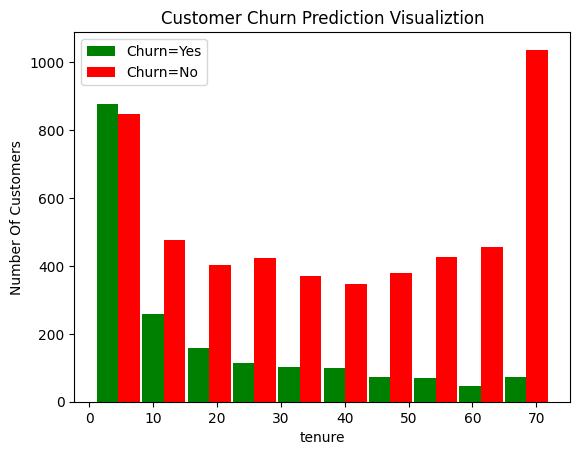

In [16]:
tenure_churn_no = data[data.Churn=='No'].tenure
tenure_churn_yes = data[data.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

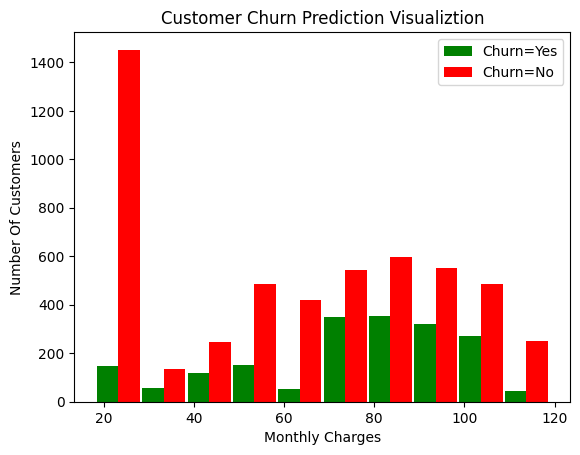

In [17]:
mc_churn_no = data[data.Churn=='No'].MonthlyCharges      
mc_churn_yes = data[data.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

### Lets replace the all the categorical values (yes/no/other) to Yes/No  

In [18]:
data.replace("No phone service","No",inplace=True)

In [19]:
data.replace("No internet service","No",inplace=True)

In [20]:
for column in data:
    print(f'{column} : {data[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


### Now lets give the numbers to the categorical variables yes/no

In [21]:
num_data={"Yes":"1","No":"0"}

In [22]:
data.replace(["Yes","No"],[1,0],inplace=True)

In [23]:
data.replace(["Female","Male"],[1,0],inplace=True)

In [24]:
for column in data:
    print(f'{column} : {data[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [25]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


### Now let's do the one hot encoding for the columns which have more than two types of categorical variables  

In [26]:
columns_one_hot_encoding=["InternetService","Contract","PaymentMethod"]

In [27]:
data_model=pd.get_dummies(data,columns=columns_one_hot_encoding)


In [28]:
data_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [29]:
for column in data_model:
    print(f'{column} : {data_model[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_0 : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


## So now the data cleaning is done. Now lets do some preprocessing before training the model 

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]

In [32]:
scaler=MinMaxScaler()
data_model[cols_to_scale]=scaler.fit_transform(data_model[cols_to_scale])

In [33]:
data_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [34]:
for column in data_model:
    print(f'{column} : {data_model[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

## Model Preparation 

In [35]:
X=data_model.drop("Churn",axis="columns")
y=data_model["Churn"]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,)

In [37]:
len(X_train)

5625

In [38]:
len(y_train)

5625

In [39]:
len(y_test)

1407

In [40]:
model=keras.Sequential([
    keras.layers.Dense(50,input_shape=(26,),activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(12,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="ADAM",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 5s 6ms/step - loss: 0.4831 - accuracy: 0.7641
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4323 - accuracy: 0.7950
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4275 - accuracy: 0.8002
Epoch 4/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4228 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4214 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4177 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4179 - accuracy: 0.8028
Epoch 8/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4152 - accuracy: 0.8066
Epoch 9/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4127 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4103 - accura

In [41]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 6ms/step - loss: 0.7361 - accuracy: 0.7690


[0.7361446022987366, 0.7690120935440063]

In [42]:
y_pred=model.predict(X_test)
y_pred[:10]

44/44 [==============================] - 1s 6ms/step


array([[7.2894744e-03],
       [8.8185328e-01],
       [1.5406383e-09],
       [5.2615312e-10],
       [2.8061077e-05],
       [4.7533000e-03],
       [9.3929080e-04],
       [7.3032925e-06],
       [1.6208598e-01],
       [2.7709384e-06]], dtype=float32)

In [43]:
yp=[]
for i in y_pred:
    if i >0.5:
        yp.append(1)
    else:
        yp.append(0)
    

In [44]:
yp[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [45]:
y_test[:10]

C:\Users\user\AppData\Local\Temp\ipykernel_2400\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


5916    0
5186    1
4932    0
4066    0
6316    0
401     0
221     0
605     0
3202    0
1902    0
Name: Churn, dtype: int64

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1055
           1       0.55      0.41      0.47       352

    accuracy                           0.77      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.75      0.77      0.76      1407



In [47]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=yp)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[939, 116],
       [209, 143]])>

Text(0.5, 1.0, 'Confusion Matrix')

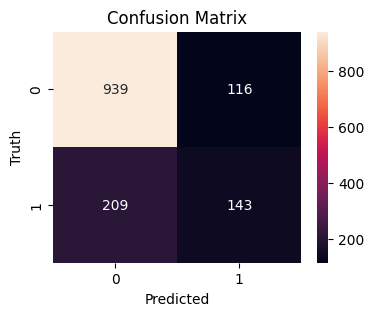

In [48]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")

# Now balancing the imbalanced Dataset

In [49]:
def ANN(X_train,X_test,y_train,y_test,loss,weights):
    
    model=keras.Sequential([
    keras.layers.Dense(50,input_shape=(26,),activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(12,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
    ])

    model.compile(optimizer="ADAM",
             loss=loss,
             metrics=["accuracy"])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
        
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return 0  


    

In [50]:
data_model["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

## So now Lets use the different techniques to balance the required dataset

In [51]:
churn_0,churn_1=data_model["Churn"].value_counts()

In [52]:
churn_0

5163

In [53]:
df1=data_model.copy()

In [54]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [55]:
df_churn_0=df1[df1["Churn"]==0]
df_churn_1=df1[df1["Churn"]==1]

# Undersampling Technique

In [56]:
df_churn_0=df_churn_0.sample(churn_1)
df2=pd.concat([df_churn_0,df_churn_1],axis=0)

In [57]:
df2["Churn"].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [58]:
X1=df2.drop("Churn",axis='columns')
y1=df2["Churn"]

In [59]:
X1.shape

(3738, 26)

In [60]:
y1.shape

(3738,)

In [61]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=15)

In [62]:
len(X_train1)

2990

In [63]:
y_train1.value_counts()

1    1499
0    1491
Name: Churn, dtype: int64

## Now lets train the model

In [64]:
ANN(X_train1,X_test1,y_train1,y_test1,"binary_crossentropy",-1)

Epoch 1/100
94/94 [==============================] - 4s 7ms/step - loss: 0.5685 - accuracy: 0.7281
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4985 - accuracy: 0.7629
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4876 - accuracy: 0.7676
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4800 - accuracy: 0.7696
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4750 - accuracy: 0.7732
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4715 - accuracy: 0.7746
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4707 - accuracy: 0.7766
Epoch 8/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4660 - accuracy: 0.7769
Epoch 9/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4627 - accuracy: 0.7816
Epoch 10/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4608 - accuracy: 0.7779
Epoch 11/

94/94 [==============================] - 1s 6ms/step - loss: 0.2764 - accuracy: 0.8779
Epoch 84/100
94/94 [==============================] - 1s 7ms/step - loss: 0.2703 - accuracy: 0.8833
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2662 - accuracy: 0.8816
Epoch 86/100
94/94 [==============================] - 1s 7ms/step - loss: 0.2654 - accuracy: 0.8849
Epoch 87/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2649 - accuracy: 0.8826
Epoch 88/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2645 - accuracy: 0.8809
Epoch 89/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2618 - accuracy: 0.8883
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2642 - accuracy: 0.8766
Epoch 91/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2628 - accuracy: 0.8843
Epoch 92/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2533 - accuracy: 0.8950
Epoch 93/100


0

# Oversampling Technique

In [65]:
df1_churn_0=df1[df1["Churn"]==0]
df1_churn_1=df1[df1["Churn"]==1]

In [66]:
df1_churn_1=df1_churn_1.sample(churn_0,replace=True)
df3=pd.concat([df1_churn_0,df1_churn_1],axis=0)

In [67]:
df3["Churn"].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [68]:
X2=df3.drop("Churn",axis='columns')
y2=df3["Churn"]

In [69]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2,random_state=15)

In [70]:
len(X_train2)

8260

In [71]:
len(X_test2)

2066

In [72]:
y_train2.value_counts()

1    4145
0    4115
Name: Churn, dtype: int64

## Now lets train the model

In [73]:
ANN(X_train2,X_test2,y_train2,y_test2,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 5s 7ms/step - loss: 0.5272 - accuracy: 0.7455
Epoch 2/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4901 - accuracy: 0.7605
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4803 - accuracy: 0.7655
Epoch 4/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4755 - accuracy: 0.7671
Epoch 5/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4693 - accuracy: 0.7736
Epoch 6/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4634 - accuracy: 0.7769
Epoch 7/100
259/259 [==============================] - 2s 8ms/step - loss: 0.4556 - accuracy: 0.7768
Epoch 8/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4491 - accuracy: 0.7788
Epoch 9/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4411 - accuracy: 0.7870
Epoch 10/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4347 - accura

0

# SMOTE

In [76]:
X3=df1.drop('Churn',axis="columns")
y3=df1["Churn"]

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X3, y3)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [85]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15)

In [86]:
y_train3.value_counts()

1    4174
0    4086
Name: Churn, dtype: int64

## Lets train the model

In [87]:
ANN(X_train3,X_test3,y_train3,y_test3,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 5s 5ms/step - loss: 0.5248 - accuracy: 0.7367
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4645 - accuracy: 0.7833
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4550 - accuracy: 0.7868
Epoch 4/100
259/259 [==============================] - 4s 14ms/step - loss: 0.4459 - accuracy: 0.7926
Epoch 5/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4401 - accuracy: 0.7942
Epoch 6/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4320 - accuracy: 0.7995
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4254 - accuracy: 0.8036
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4187 - accuracy: 0.8077
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4130 - accuracy: 0.8108
Epoch 10/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4041 - accur

0

### SMOTE Oversampling Technique increases f1 score of minority class 1 from 0.47 to 0.80 (huge improvement) Also over all accuracy improves from 0.77 to 0.80

# Use of Ensemble with Undersampling

In [98]:
X=df1.drop("Churn",axis="columns")
y=df1["Churn"]

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [102]:
y_train.value_counts()

0    4123
1    1502
Name: Churn, dtype: int64

In [103]:
dfff=X_train.copy()
dfff["Churn"]=y_train

In [105]:
dfff_churn0=dfff[dfff["Churn"]==0]
dfff_churn1=dfff[dfff["Churn"]==1]

In [108]:
def get_batch_size(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train=df_train.drop("Churn",axis="columns")
    y_train=df_train["Churn"]
    return X_train,y_train

In [109]:
X_train,y_train=get_batch_size(dfff_churn0,dfff_churn1,0,1502)

In [110]:
ANN(X_train,X_test,y_train,y_test,"binary_crossentropy",-1)

Epoch 1/100
94/94 [==============================] - 3s 6ms/step - loss: 0.5751 - accuracy: 0.7170
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5049 - accuracy: 0.7590
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4901 - accuracy: 0.7630
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4829 - accuracy: 0.7690
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4778 - accuracy: 0.7763
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4696 - accuracy: 0.7816
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4669 - accuracy: 0.7770
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4636 - accuracy: 0.7843
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4592 - accuracy: 0.7820
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4563 - accuracy: 0.7893
Epoch 11/

94/94 [==============================] - 1s 7ms/step - loss: 0.2346 - accuracy: 0.9011
Epoch 84/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2386 - accuracy: 0.8965
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2361 - accuracy: 0.8988
Epoch 86/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2308 - accuracy: 0.9038
Epoch 87/100
94/94 [==============================] - 1s 8ms/step - loss: 0.2277 - accuracy: 0.9018
Epoch 88/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2231 - accuracy: 0.9061
Epoch 89/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2240 - accuracy: 0.9001
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2177 - accuracy: 0.9115
Epoch 91/100
94/94 [==============================] - 1s 6ms/step - loss: 0.2241 - accuracy: 0.9035
Epoch 92/100
94/94 [==============================] - 1s 7ms/step - loss: 0.2148 - accuracy: 0.9091
Epoch 93/100


0

In [111]:
X_train,y_train=get_batch_size(dfff_churn0,dfff_churn1,1503,3004)

In [112]:
ANN(X_train,X_test,y_train,y_test,"binary_crossentropy",-1)

Epoch 1/100
94/94 [==============================] - 4s 7ms/step - loss: 0.6046 - accuracy: 0.6950
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5008 - accuracy: 0.7649
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4883 - accuracy: 0.7709
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4834 - accuracy: 0.7739
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4790 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4760 - accuracy: 0.7749
Epoch 7/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4733 - accuracy: 0.7759
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4682 - accuracy: 0.7796
Epoch 9/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4654 - accuracy: 0.7792
Epoch 10/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4599 - accuracy: 0.7849
Epoch 11/

94/94 [==============================] - 0s 5ms/step - loss: 0.2344 - accuracy: 0.9011
Epoch 84/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2329 - accuracy: 0.9034
Epoch 85/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2306 - accuracy: 0.9118
Epoch 86/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2351 - accuracy: 0.9028
Epoch 87/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.9081
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2299 - accuracy: 0.9101
Epoch 89/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2232 - accuracy: 0.9074
Epoch 90/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.9131
Epoch 91/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2251 - accuracy: 0.9008
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.9111
Epoch 93/100


0

In [113]:
X_train,y_train=get_batch_size(dfff_churn0,dfff_churn1,3005,4123)

In [114]:
ANN(X_train,X_test,y_train,y_test,"binary_crossentropy",-1)

Epoch 1/100
82/82 [==============================] - 7s 20ms/step - loss: 0.6039 - accuracy: 0.7019
Epoch 2/100
82/82 [==============================] - 1s 18ms/step - loss: 0.5089 - accuracy: 0.7603
Epoch 3/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4902 - accuracy: 0.7592
Epoch 4/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4858 - accuracy: 0.7645
Epoch 5/100
82/82 [==============================] - 1s 9ms/step - loss: 0.4801 - accuracy: 0.7725
Epoch 6/100
82/82 [==============================] - 1s 8ms/step - loss: 0.4754 - accuracy: 0.7752
Epoch 7/100
82/82 [==============================] - 1s 9ms/step - loss: 0.4703 - accuracy: 0.7779
Epoch 8/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4679 - accuracy: 0.7802
Epoch 9/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4669 - accuracy: 0.7840
Epoch 10/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4641 - accuracy: 0.7809
Ep

0

In [116]:
y_pred=model.predict(X_test)

44/44 [==============================] - 0s 6ms/step


In [131]:
y_pred_final=y_pred.reshape(-1)
y_pred_final

array([5.0701910e-08, 3.4508889e-03, 2.4986668e-02, ..., 3.6885908e-01,
       3.5940964e-05, 1.2039634e-03], dtype=float32)

In [135]:
for i in range(len(y_pred_final)):
    if y_pred_final[i]>=0.5:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0
    

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1040
           1       0.83      0.60      0.70       367

    accuracy                           0.86      1407
   macro avg       0.85      0.78      0.80      1407
weighted avg       0.86      0.86      0.86      1407

